<a href="https://colab.research.google.com/github/JohannesKarwou/notebooks/blob/main/Bootstrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/JohannesKarwou/notebooks/main/data/summary.csv")

In [33]:
def bootstrap_function(x_values, y_values):
  # bootstrap metric
  def bootstrap_metric(fct, x_values, y_values):
      assert callable(fct) == True
      bootstrapped_metric = []
      # bootstrap metric to generate test distribution
      for _ in range(1000):
          indices = np.random.choice(range(0, len(x_values)), size=len(x_values), replace=True)
          x_selection = np.take(x_values, indices)
          y_selection = np.take(y_values, indices)
          r = fct(x_selection, y_selection)
          bootstrapped_metric.append(r)    

      # define 90% CI
      alpha = 10.0
      lower_p = alpha / 2.0
      # get value at or near percentile (take a look at the definition of percentile if 
      # you have less than 100 values to make sure you understand what is happening)
      lower = np.percentile(bootstrapped_metric, lower_p)
      upper_p = (100 - alpha) + (alpha / 2.0)
      upper = np.percentile(bootstrapped_metric, upper_p)
      # calculate true mean
      mean = fct(x_values, y_values)

      return mean, lower, upper

  # bootstrap MAE
  mean, lower, upper = bootstrap_metric(mean_absolute_error, x_values, y_values)
  print(f'MAE:  {round(mean, 2):.2f} [{round(lower,2):.2f}, {round(upper,2):.2f}]')

  # bootstrap RMSE
  def calc_rmse(x_values, y_values):
      from sklearn.metrics import mean_squared_error
      return np.sqrt(mean_squared_error(x_values, y_values))
  mean, lower, upper = bootstrap_metric(calc_rmse, x_values, y_values)
  print(f'RMSE:  {round(mean, 2):.2f} [{round(lower,2):.2f}, {round(upper,2):.2f}]')
  plt.show()



In [51]:
## all values ###
x_values = np.asarray_chkfinite(df["literature"][0:75])
y_values = np.asarray_chkfinite(df['TF'][0:75])

print(f'for all ddG values')
bootstrap_function(x_values, y_values)

## JNK1 ###
x_values = np.asarray_chkfinite(df["literature"][46:75])
y_values = np.asarray_chkfinite(df['TF'][46:75])

print(f'ddG values for JNK1')
bootstrap_function(x_values, y_values)

## 2RA0 ###
x_values = np.asarray_chkfinite(df["ABMER TI"][46:75])
y_values = np.asarray_chkfinite(df['TF'][46:75])

print(f'ddG values for JNK1')
bootstrap_function(x_values, y_values)

for all ddG values
MAE:  0.87 [0.73, 1.03]
RMSE:  1.18 [0.99, 1.36]
ddG values for JNK1
MAE:  0.68 [0.51, 0.88]
RMSE:  0.91 [0.64, 1.18]


KeyError: ignored

In [50]:
df["literature"][46:75]

46    0.26
47   -0.32
48    0.38
49    0.17
50   -0.21
51   -1.12
52    0.92
53   -1.27
54    0.59
55    0.68
56   -0.15
57   -1.21
58    0.73
59    0.10
60    0.39
61   -0.53
62    0.77
63    0.39
64   -0.27
65   -0.59
66    0.17
67   -0.66
68    0.21
69    0.19
70    0.71
71   -0.82
72   -0.98
73   -0.59
74   -0.25
Name: literature, dtype: float64

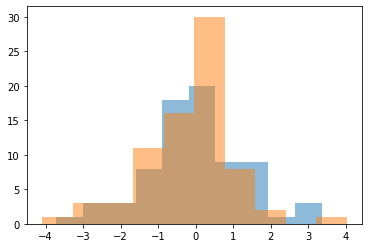

In [45]:
plt.hist(x_values, alpha=0.5)
plt.hist(y_values, alpha=0.5)
plt.show()